In [95]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 


In [96]:
#importing data sets 
from sklearn.datasets import load_diabetes 


In [97]:
#loading daibetes data sets 
data_sets = load_diabetes()

In [98]:
dir(data_sets)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [106]:
#converting into pandas dataframe 
df = pd.DataFrame(data = data_sets.data  , columns = data_sets.feature_names  )
df.sample(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
228,-0.052738,-0.044642,-0.012673,-0.060756,-0.000193,0.008081,0.011824,-0.002592,-0.027129,-0.050783
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003709,0.073480


In [107]:
#adding traget variables 
df['Target'] = data_sets.target

In [108]:
df['Target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [109]:
df['Target'] = df['Target'].astype(int)

In [110]:
df['Target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: Target
Non-Null Count  Dtype
--------------  -----
442 non-null    int32
dtypes: int32(1)
memory usage: 1.9 KB


Applying linear regressions 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [113]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1 ] 

In [114]:
x.shape , y.shape

((442, 10), (442,))

In [115]:
#now , 
y = np.asarray(y).reshape(-1 , 1 )

In [116]:
y.shape #good 

(442, 1)

## Doing train test split 

In [117]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 20 ) 

# Lasso regression 

In [118]:

from sklearn.linear_model import Lasso 
from sklearn.metrics import r2_score

In [119]:
alpha = [ 0 , 0.1 , 1 , 10 ] 
coef = []
r2_scores = [] 

In [120]:
for i in alpha:
    reg_lasso = Lasso(alpha = i)
    reg_lasso.fit( xtrain , ytrain)
    coef.append(reg_lasso.coef_.tolist()) 
    y_pred = reg_lasso.predict(xtest) 
    r2_scores.append(r2_score(y_pred , ytest))    

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_12648\3317091775.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_lasso.fit( xtrain , ytrain)
D:\software\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\software\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.813e+05, tolerance: 2.080e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Alpha = 0.1   , r2_score = -7.567468804289098e+30')

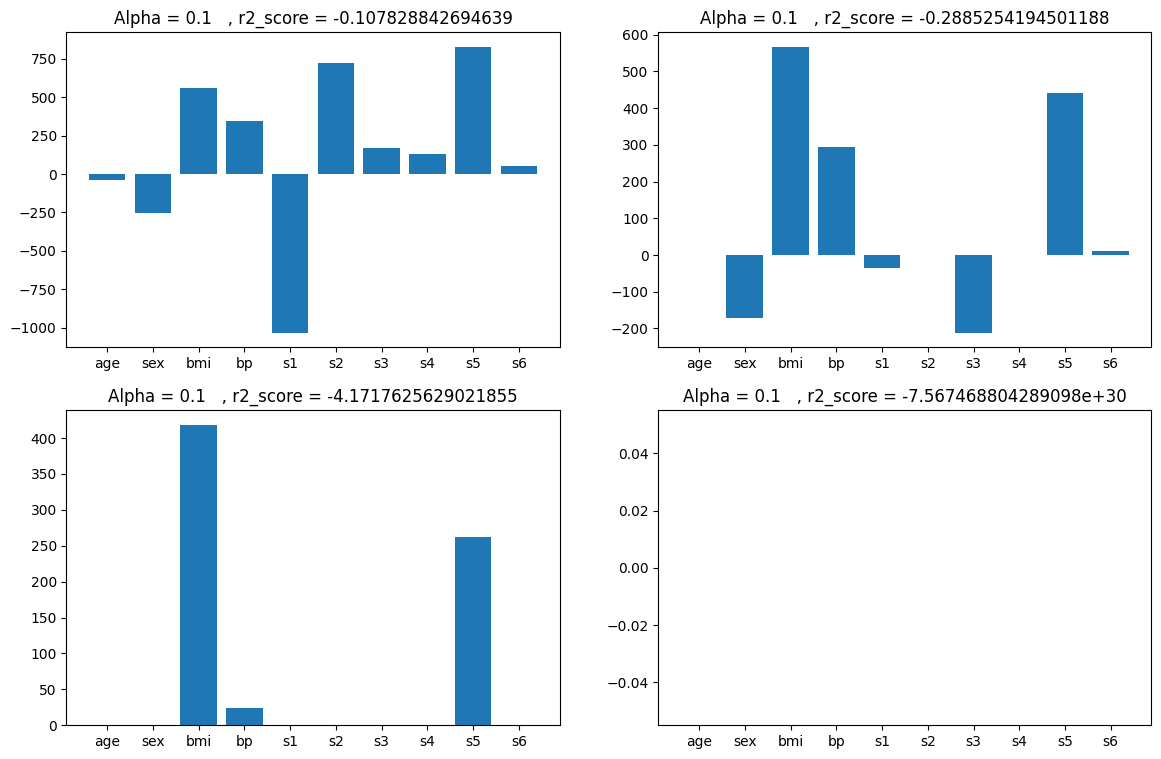

In [121]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data_sets.feature_names , coef[0])
plt.title(f"Alpha = 0.1   , r2_score = {r2_scores[0]}")

plt.subplot(222)
plt.bar(data_sets.feature_names , coef[1])
plt.title(f"Alpha = 0.1   , r2_score = {r2_scores[1]}")

plt.subplot(223)
plt.bar(data_sets.feature_names , coef[2])
plt.title(f"Alpha = 0.1   , r2_score = {r2_scores[2]}")


plt.subplot(224)
plt.bar(data_sets.feature_names , coef[3])
plt.title(f"Alpha = 0.1   , r2_score = {r2_scores[3]}")





In [131]:
features = np.array(coef)
features.shape

(4, 10)

Comparing

In [132]:
new_df = pd.DataFrame(data = features , columns = data_sets.feature_names)

In [133]:
new_df['alphas'] = np.array(alpha)

In [138]:
 new_df.set_index('alphas')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alphas,,,,,,,,,,
0.0,-40.432055,-255.596944,561.211521,346.660737,-1034.954238,726.216336,167.039600,127.47606,830.266279,51.240135
0.1,-0.000000,-171.779492,567.362106,292.827292,-35.487089,-0.000000,-212.174787,0.00000,439.936929,11.893382
1.0,0.000000,-0.000000,417.681214,24.049279,0.000000,0.000000,-0.000000,0.00000,262.272765,0.000000
10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.00000,0.000000,0.000000


## Plotting

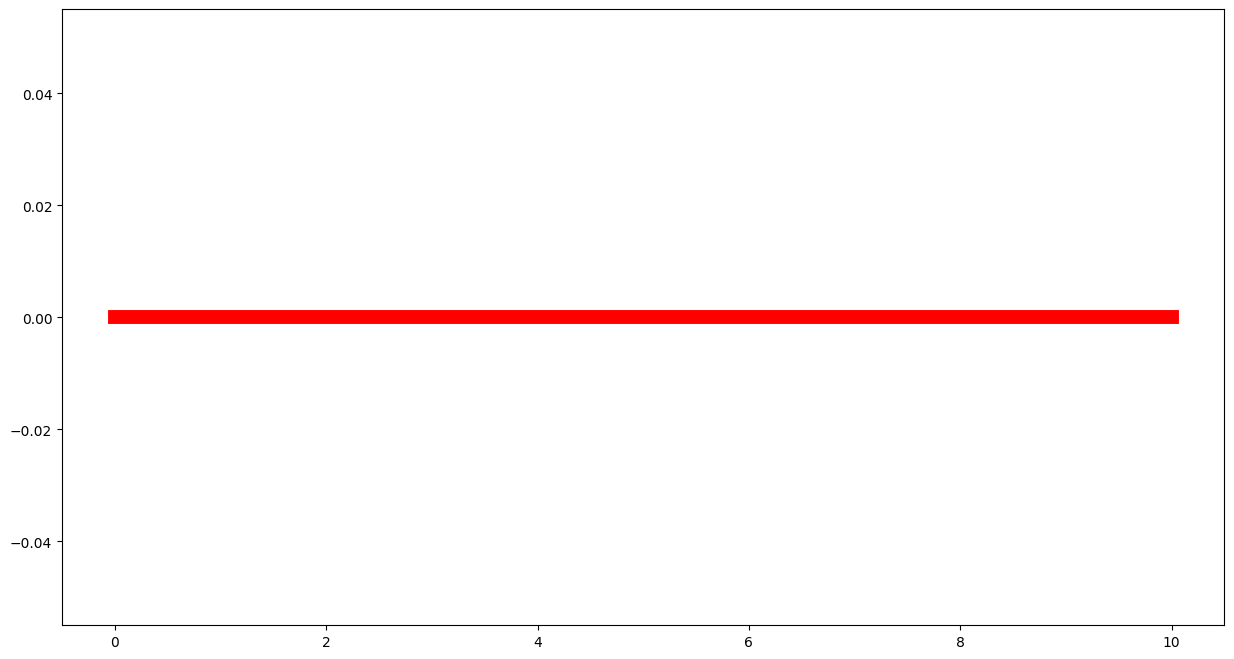

In [144]:
plt.figure(figsize=(15,8))
plt.plot(alpha , np.zeros(len(alpha)) , color = 'red' , linewidth = 10 )

AttributeError: feature

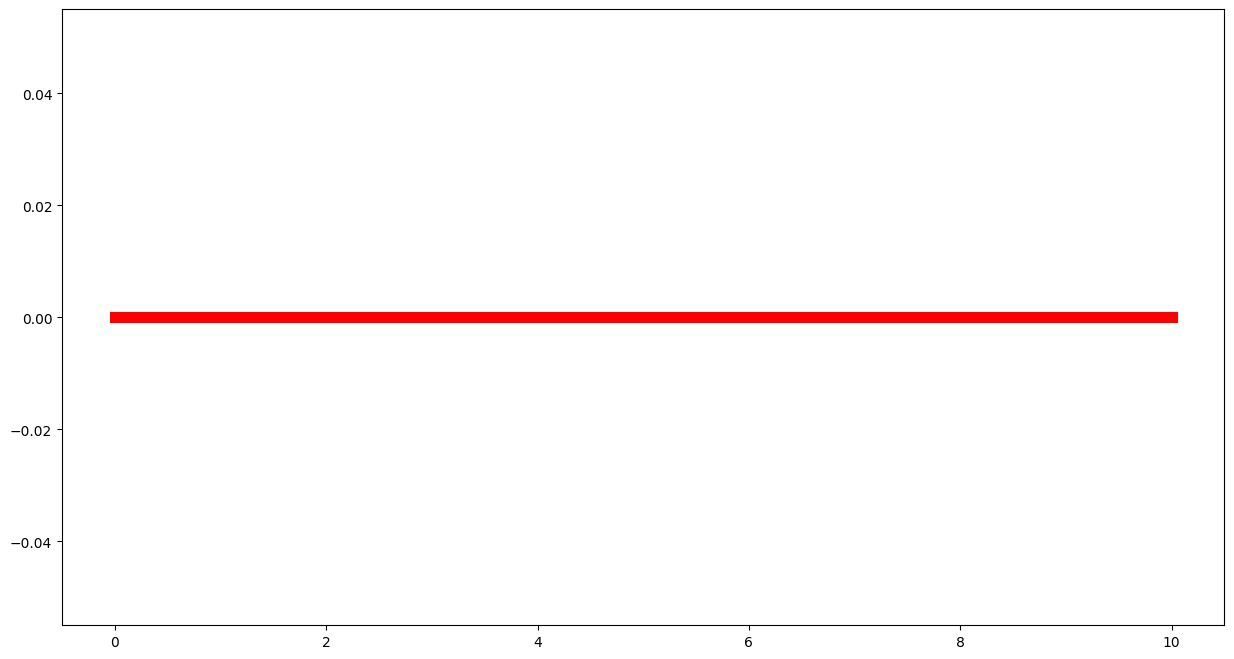

In [146]:
plt.figure(figsize=(15,8))
plt.plot(alpha , np.zeros(len(alpha)) , color = 'red' , linewidth = 8 )
for i in alpha :
    plt.plot( i ,  coef[i] , label = data_sets.feature.datas[i])